In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
bank = pd.read_csv("C:/Users/sivar/Desktop/Praxis/ML(Machine Learining)/Data/bankloan.csv" ,na_values = '#NULL!')

In [3]:
bank.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176.0,9.3,11.36,5.01,1.0
1,27,1,10,6,31.0,17.3,1.36,4.00,0.0
2,40,1,15,14,55.0,5.5,0.86,2.17,0.0
3,41,1,15,14,120.0,2.9,2.66,0.82,0.0
4,24,2,2,0,28.0,17.3,1.79,3.06,1.0


In [4]:
bank.shape

(850, 9)

In [5]:
bank.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [6]:
main = bank.copy()

In [7]:
main = main.drop(["ed","default"],axis=1)

In [8]:
main.shape

(850, 7)

# K- Means Clustering

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
s = StandardScaler()

In [11]:
SS_X = s.fit_transform(main)

In [12]:
SS_X

array([[  7.42915406e-01,   1.24509121e+00,   5.26521072e-01, ...,
         -1.29796542e-01,   4.60490888e+00,   5.68514841e-01],
       [ -9.99093132e-01,   2.11712398e-01,  -3.44184981e-01, ...,
          1.06147959e+00,  -1.02001517e-01,   2.71183138e-01],
       [  6.18486225e-01,   9.49840118e-01,   8.16756424e-01, ...,
         -6.95652705e-01,  -3.37347037e-01,  -2.67546582e-01],
       ..., 
       [  1.61391968e+00,   6.54589030e-01,   3.81403397e-01, ...,
          9.35677327e-02,  -4.03243783e-01,   8.86626861e-02],
       [ -3.65968180e-03,  -1.11691750e+00,   3.81403397e-01, ...,
         -3.53160817e-01,  -5.44451095e-01,  -4.79505816e-01],
       [  2.45198681e-01,   1.68796784e+00,   6.71638748e-01, ...,
          4.06277718e-01,  -3.18519396e-01,   3.85994389e-01]])

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [55]:
X = []
for i in range (1,10):
    km = KMeans(n_clusters=i, n_init=50)
    s = km.fit(SS_X).inertia_
    X.append(s)

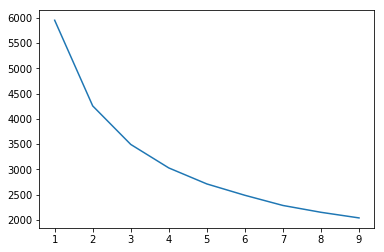

In [56]:
plt.plot(range(1,10),X)

In [57]:
km = KMeans(n_clusters=4,n_init=50)

In [58]:
fit = km.fit(SS_X)

In [59]:
silhouette_score(X=SS_X,labels=fit.labels_)

0.25119402786621875

In [60]:
from sklearn.neighbors import LocalOutlierFactor

In [61]:
LO = LocalOutlierFactor(n_neighbors=5)

In [62]:
outlier = LO.fit_predict(main)

In [63]:
outlier

array([ 1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,
       -1,  1,  1,  1,  1

In [64]:
outlier = pd.DataFrame(outlier)

In [65]:
outlier.shape

(850, 1)

In [66]:
outlier[0].value_counts()

 1    765
-1     85
Name: 0, dtype: int64

In [67]:
main['outlier'] = outlier

In [68]:
main.head()

,age,employ,address,income,debtinc,creddebt,othdebt,outlier
0,41,17,12,176.0,9.3,11.36,5.01,1
1,27,10,6,31.0,17.3,1.36,4.00,1
2,40,15,14,55.0,5.5,0.86,2.17,1
3,41,15,14,120.0,2.9,2.66,0.82,1
4,24,2,0,28.0,17.3,1.79,3.06,1


In [69]:
main_1 = main[main.outlier == 1 ]

In [70]:
main_1.shape

(765, 8)

In [71]:
main_1 = main_1.drop(['outlier'],axis=1)

In [72]:
main_1.head()

,age,employ,address,income,debtinc,creddebt,othdebt
0,41,17,12,176.0,9.3,11.36,5.01
1,27,10,6,31.0,17.3,1.36,4.00
2,40,15,14,55.0,5.5,0.86,2.17
3,41,15,14,120.0,2.9,2.66,0.82
4,24,2,0,28.0,17.3,1.79,3.06


In [32]:
main_1.shape

(765, 7)

In [33]:
s = StandardScaler()
ss_x = s.fit_transform(main_1)

In [34]:
ss_x

array([[  8.19752054e-01,   1.30595254e+00,   5.68476575e-01, ...,
         -4.62203670e-02,   6.63239988e+00,   8.65205013e-01],
       [ -9.72357458e-01,   2.42482976e-01,  -3.43549807e-01, ...,
          1.34107069e+00,   5.80825983e-04,   4.77385125e-01],
       [  6.91744232e-01,   1.00210409e+00,   8.72485369e-01, ...,
         -7.05183617e-01,  -3.31010127e-01,  -2.25298434e-01],
       ..., 
       [  1.71580681e+00,   6.98255645e-01,   4.16472178e-01, ...,
          2.13896706e-01,  -4.23855594e-01,   2.39317471e-01],
       [  5.17051204e-02,  -1.12483503e+00,   4.16472178e-01, ...,
         -3.06337440e-01,  -6.22810165e-01,  -5.01764096e-01],
       [  3.07720765e-01,   1.76172521e+00,   7.20480972e-01, ...,
          5.78060607e-01,  -3.04482851e-01,   6.27137359e-01]])

In [73]:
SS = []
for i in range (1,10):
    km = KMeans(n_clusters=i,n_init=50)
    S = km.fit(ss_x).inertia_
    SS.append(S)

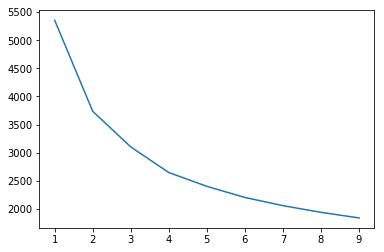

In [74]:
plt.plot(range(1,10),SS)

In [75]:
km_1 = KMeans(n_clusters=4,n_init=50)

In [76]:
fit_1 = km.fit(ss_x)

In [84]:
silhouette_score(X=ss_x,labels=fit_1.labels_)

0.21538575997780948

# Hierarchical Clustering

In [86]:
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree

In [87]:
link_complete = linkage (y=SS_X,method='complete')

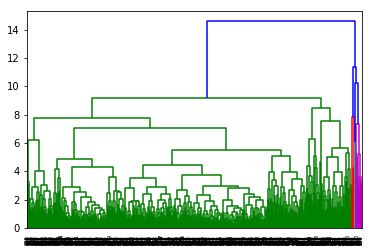

In [88]:
plt.show(dendrogram(link_complete))

In [90]:
cut = cut_tree(link_complete, height=12)

In [92]:
cut = pd.DataFrame(cut)

In [93]:
cut[0].value_counts()

1    826
0     24
Name: 0, dtype: int64